# Simplyfied geologic model of a volcanic diatreme structure


## written by Anton Ziegon


Imports


In [15]:
# Imports and settings
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

import gempy as gp

# Importing auxiliary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Setting options
np.random.seed(1515)
pd.set_option('precision', 2)

### Loading surface points and orientations

In [61]:
geo_model_diatreme = gp.create_model('simple_diatreme')

# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model_diatreme, [0, 150, 0, 150., -60, 0], [60, 60, 60],
             path_i='RM_surface_points_diatreme_easy.csv', path_o='RM_orientations_diatreme_easy.csv',
             default_values=True)

Active grids: ['regular']


simple_diatreme  2022-11-30 16:09

Sortring Formations

In [62]:
geo_model_diatreme.series

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Basement,2,Erosion,False,False,False


In [63]:
gp.map_stack_to_surfaces(geo_model_diatreme,
                         {"Lith":('Diatreme','basement')},
                         remove_unused_series=True)
geo_model_diatreme.set_bottom_relation('Lith',bottom_relation='Erosion')
geo_model_diatreme.series

,order_series,BottomRelation,isActive,isFault,isFinite
Lith,1,Erosion,True,False,False


Set random Topography

In [38]:
geo_model_diatreme.set_topography(source='random')

[-12.   0.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  1.875     ,   1.875     , -59.25      ],
       [  1.875     ,   1.875     , -57.75      ],
       [  1.875     ,   1.875     , -56.25      ],
       ...,
       [150.        , 142.30769231,  -2.96597919],
       [150.        , 146.15384615,  -3.44176696],
       [150.        , 150.        ,  -3.14863519]])

### First inspection of data points in 2D and 3D

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


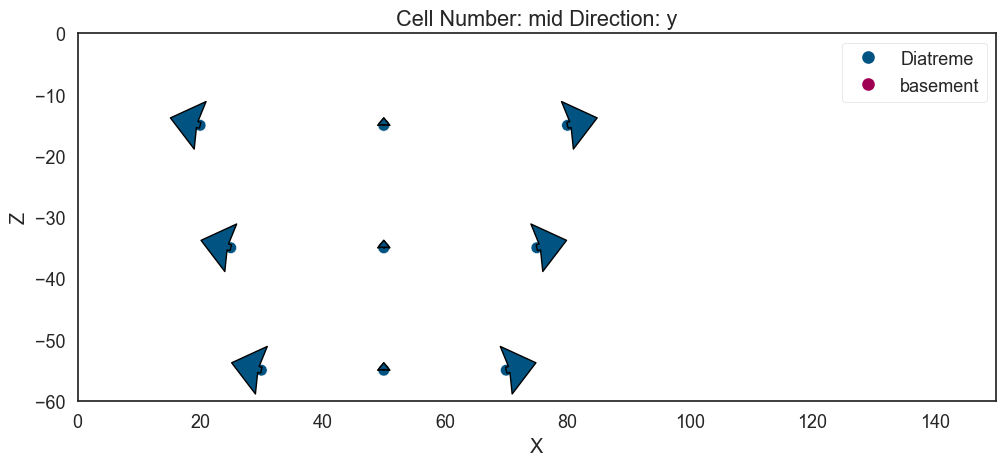

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\pyvista\utilities\helpers.py:475: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [64]:
plot = gp.plot_2d(geo_model_diatreme, show_lith=False, show_boundaries=False, show_topography=False)
plt.show()

gpv = gp.plot_3d(geo_model_diatreme, image=False, plotter_type='background', show_topography=False)

### Set interpolator and solve model

In [65]:
gp.set_interpolator(geo_model_diatreme, compile_theano=True, theano_optimizer='fast_compile')
sol = gp.compute_model(geo_model_diatreme, debug=False)

Setting kriging parameters to their default values.
Compiling theano function...


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are prob

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             220.45
$C_o$            1157.14
drift equations      [3]


Visulaizing solution in 3D

In [66]:
ver, sim = gp.get_surfaces(geo_model_diatreme)
gpv = gp.plot_3d(geo_model_diatreme, show_data=False, show_lith=False, image=False, plotter_type='background')

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


Visulizing cross sections for further inspestion

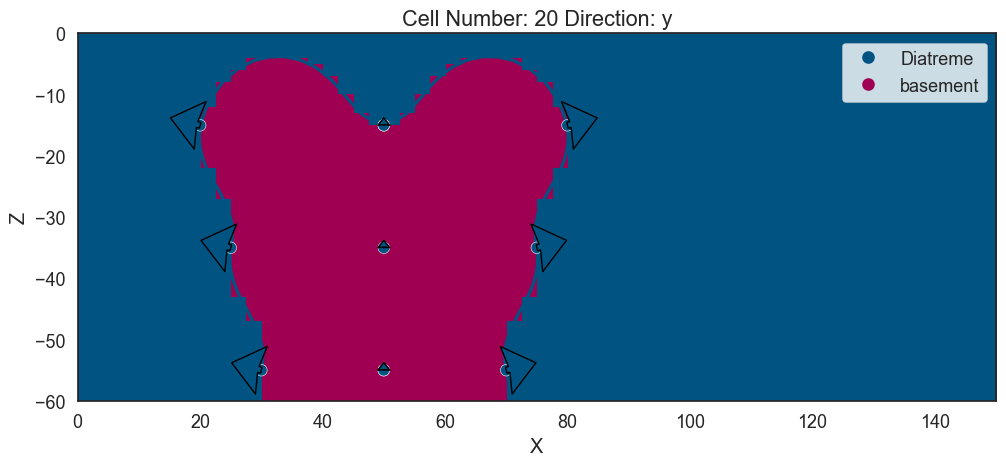

In [68]:
gp.plot_2d(geo_model_diatreme, show_data=True, direction='y', cell_number=20,
           plot_data=True, show_topography=False)#, section_names=['topography'])
plt.show()